In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
ally_direct = pd.read_csv("./alliances/alliance_v4.1_by_directed.csv")
#ally_direct_year = pd.read_csv("/alliances/alliance_v4.1_by_directed_yearly.csv")
#ally_dyad = pd.read_csv("/alliances/alliance_v4.1_by_dyad.csv")
#ally_dyad_year = pd.read_csv("/alliances/alliance_v4.1_by_dyad_yearly.csv")
#ally_member = pd.read_csv("/alliances/alliance_v4.1_by_member.csv")
#ally_member_year = pd.read_csv("/alliances/alliance_v4.1_by_member_yearly.csv")

In [3]:
ally_direct.info()
# Double the amount of entries as they are repeated in both directions
ally_direct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6444 entries, 0 to 6443
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   version4id      6444 non-null   int64  
 1   ccode1          6444 non-null   int64  
 2   state_name1     6444 non-null   object 
 3   ccode2          6444 non-null   int64  
 4   state_name2     6444 non-null   object 
 5   dyad_st_day     6444 non-null   int64  
 6   dyad_st_month   6444 non-null   int64  
 7   dyad_st_year    6444 non-null   int64  
 8   dyad_end_day    3252 non-null   float64
 9   dyad_end_month  3252 non-null   float64
 10  dyad_end_year   3252 non-null   float64
 11  left_censor     6444 non-null   int64  
 12  right_censor    6444 non-null   int64  
 13  defense         6444 non-null   int64  
 14  neutrality      6444 non-null   int64  
 15  nonaggression   6441 non-null   float64
 16  entente         6442 non-null   float64
 17  version         6444 non-null   f

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,version
0,1,200,United Kingdom,235,Portugal,1,1,1816,NaN,NaN,NaN,1,1,1,0,1.0,0.0,4.1
1,1,235,Portugal,200,United Kingdom,1,1,1816,NaN,NaN,NaN,1,1,1,0,1.0,0.0,4.1
2,2,200,United Kingdom,380,Sweden,1,1,1816,15.0,2.0,1911.0,1,0,0,0,0.0,1.0,4.1
3,2,380,Sweden,200,United Kingdom,1,1,1816,15.0,2.0,1911.0,1,0,0,0,0.0,1.0,4.1
4,3,240,Hanover,245,Bavaria,1,1,1838,15.0,3.0,1848.0,0,0,1,0,1.0,1.0,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6439,412,626,South Sudan,625,Sudan,10,2,2012,27.0,3.0,2012.0,0,0,0,0,1.0,0.0,4.1
6440,413,651,Egypt,666,Israel,26,3,1979,NaN,NaN,NaN,0,1,0,0,1.0,0.0,4.1
6441,413,666,Israel,651,Egypt,26,3,1979,NaN,NaN,NaN,0,1,0,0,1.0,0.0,4.1
6442,414,2,United States of America,666,Israel,30,11,1981,26.0,12.0,1991.0,0,0,0,0,0.0,1.0,4.1


In [4]:
print("There are ", pd.concat((ally_direct['ccode1'],ally_direct['ccode2'])).nunique(), "unique states in the dataset")
ally_direct.tail()

There are  180 unique states in the dataset


,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,version
6439,412,626,South Sudan,625,Sudan,10,2,2012,27.0,3.0,2012.0,0,0,0,0,1.0,0.0,4.1
6440,413,651,Egypt,666,Israel,26,3,1979,NaN,NaN,NaN,0,1,0,0,1.0,0.0,4.1
6441,413,666,Israel,651,Egypt,26,3,1979,NaN,NaN,NaN,0,1,0,0,1.0,0.0,4.1
6442,414,2,United States of America,666,Israel,30,11,1981,26.0,12.0,1991.0,0,0,0,0,0.0,1.0,4.1
6443,414,666,Israel,2,United States of America,30,11,1981,26.0,12.0,1991.0,0,0,0,0,0.0,1.0,4.1


In [5]:
ally_direct.isnull().sum()

version4id           0
ccode1               0
state_name1          0
ccode2               0
state_name2          0
dyad_st_day          0
dyad_st_month        0
dyad_st_year         0
dyad_end_day      3192
dyad_end_month    3192
dyad_end_year     3192
left_censor          0
right_censor         0
defense              0
neutrality           0
nonaggression        3
entente              2
version              0
dtype: int64

In [6]:
pd.concat([ally_direct[ally_direct['nonaggression'].isnull()],ally_direct[ally_direct['entente'].isnull()]])

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,version
188,6,200,United Kingdom,255,Germany,1,1,1816,31.0,10.0,1822.0,1,0,1,0,NaN,1.0,4.1
189,6,200,United Kingdom,300,Austria-Hungary,1,1,1816,31.0,10.0,1822.0,1,0,1,0,NaN,1.0,4.1
190,6,200,United Kingdom,365,Russia,1,1,1816,31.0,10.0,1822.0,1,0,1,0,NaN,1.0,4.1
704,122,630,Iran,640,Turkey,22,4,1926,8.0,7.0,1937.0,0,0,0,1,1.0,NaN,4.1
705,122,640,Turkey,630,Iran,22,4,1926,8.0,7.0,1937.0,0,0,0,1,1.0,NaN,4.1


In [13]:
# Finding asymmetrical alliances
ally_dyad = pd.read_csv("./alliances/alliance_v4.1_by_dyad.csv")
asymmetrical = ally_dyad[ally_dyad['asymmetric'].astype(bool)]

# Search my directed data for these asymmetric alliance pairs
pairs = []
for index, row in asymmetrical.iterrows():
    search_values = [row['ccode1'], row['ccode2'], row['dyad_st_year']]
    mask = (ally_direct[['ccode1','ccode2','dyad_st_year']] == search_values).all(axis=1)
    mask_reverse = (ally_direct[['ccode2','ccode1','dyad_st_year']] == search_values).all(axis=1)
    pairs.append(pd.concat([ally_direct[mask], ally_direct[mask_reverse]], ignore_index=True))

# All the pairs of asymmetrical alliances
pairs[0].head()
print("There are ",len(pairs)," asymmetric alliances")

asymmetric_countries= {}
countries_favourable = {}
countries_unfavourable = {}

### Counting the number of asymmetric alliances for each country in format (alliance, favourable, unfavourable) ###
for i in range(len(pairs)):
    pair = pairs[i]
    # Counter for country 1
    asymmetric_countries[pair['state_name1'].values[0]] = asymmetric_countries.get(pair['state_name1'].values[0], 0) + 1

    # Counter for country 2
    asymmetric_countries[pair['state_name2'].values[0]] = asymmetric_countries.get(pair['state_name2'].values[0], 0) + 1

    # Finding if the alliance is favourable or not

    ### Only do once per pair, allows us to compare the agreement where each type trumps the one below it so an alliance with a neutrality, nonaggression and entente is still not as strong as a defense agreement ###
    pair1_score = 8*pair['defense'].values[0] + 4*pair['neutrality'].values[0] + 2*pair['nonaggression'].values[0] + pair['entente'].values[0]

    pair2_score = 8*pair['defense'].values[1] + 4*pair['neutrality'].values[1] + 2*pair['nonaggression'].values[1] + pair['entente'].values[1]

    # Directed so state 1 promises to aid state 2, so it is a burden on them hence <
    if pair1_score < pair2_score:
        countries_favourable[pair['state_name1'].values[0]] = countries_favourable.get(pair['state_name1'].values[0], 0) + 1
        countries_unfavourable[pair['state_name1'].values[1]] = countries_unfavourable.get(pair['state_name1'].values[1], 0) + 1
    else:
        countries_unfavourable[pair['state_name1'].values[0]] = countries_unfavourable.get(pair['state_name1'].values[0], 0) + 1
        countries_favourable[pair['state_name1'].values[1]] = countries_favourable.get(pair['state_name1'].values[1], 0) + 1

# Find the maximum key
asym_max_key = max(asymmetric_countries, key=asymmetric_countries.get)
fav_max_key = max(countries_favourable, key=countries_favourable.get)
unfav_max_key = max(countries_unfavourable, key=countries_unfavourable.get)

# Find the maximum value
asym_max_value = asymmetric_countries[asym_max_key]
fav_max_value = countries_favourable[fav_max_key]
unfav_max_value = countries_unfavourable[unfav_max_key]

# Display the result
print(asym_max_key," has the most asymmetrical alliances: ",asym_max_value)
print(fav_max_key," has the most favourable alliances: ",fav_max_value)
print(unfav_max_key," has the most unfavourable alliances: ",unfav_max_value)
state_name = 'Brazil'
#print("{} number of asymmetric alliances {}, favourable , unfavourable {} ".format(state_name,asymmetric_countries[state_name],countries_favourable[state_name],countries_unfavourable[state_name]))

There are  245  asymmetric alliances
Turkey  has the most asymmetrical alliances:  35
Turkey  has the most favourable alliances:  30
United Kingdom  has the most unfavourable alliances:  14
Brazil number of asymmetric alliances 5, favourable , unfavourable 5 


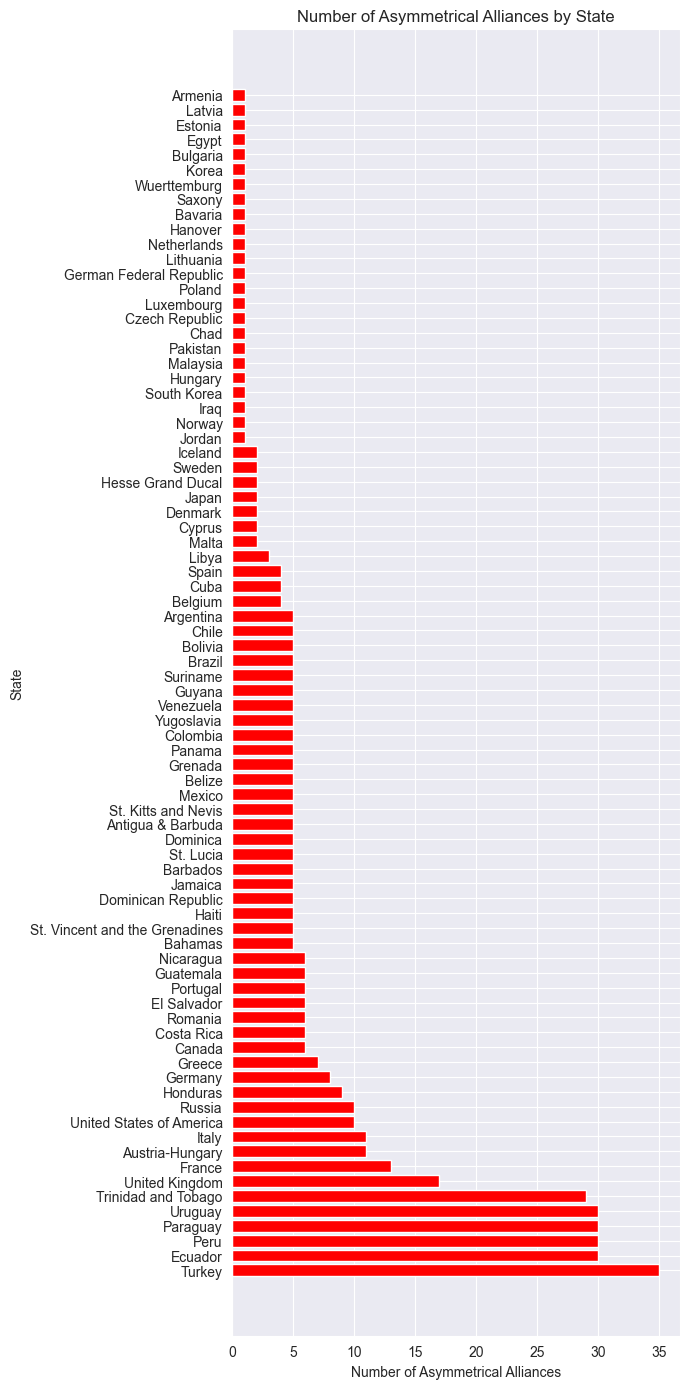

In [8]:
# Create dataframe for plot
asymmetric_df = pd.DataFrame({'state_name':asymmetric_countries.keys(),'alliances':asymmetric_countries.values()})
asymmetric_df = asymmetric_df.sort_values(by='alliances', ascending=False)

# Horizontal bar plot
plt.figure(figsize=(7, 14))
plt.barh(asymmetric_df['state_name'], asymmetric_df['alliances'], color='red')
plt.ylabel('State')
plt.xlabel('Number of Asymmetrical Alliances')
plt.title('Number of Asymmetrical Alliances by State')
plt.tight_layout()
plt.show()

In [14]:
pd.concat((ally_direct[ally_direct['state_name1'] == 'Brazil'],ally_direct[ally_direct['state_name2'] == 'Brazil']))

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,version
348,37,140,Brazil,160,Argentina,2,1,1859,14.0,9.0,1864.0,0,0,1,1,0.0,0.0,4.1
402,48,140,Brazil,160,Argentina,1,5,1865,30.0,7.0,1882.0,0,0,1,0,0.0,0.0,4.1
403,48,140,Brazil,165,Uruguay,1,1,1882,30.0,7.0,1882.0,0,0,1,0,0.0,0.0,4.1
1132,165,140,Brazil,2,United States of America,23,12,1936,23.0,3.0,1945.0,0,0,0,0,0.0,1.0,4.1
1133,165,140,Brazil,40,Cuba,23,12,1936,23.0,3.0,1945.0,0,0,0,0,0.0,1.0,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3373,210,145,Bolivia,140,Brazil,2,9,1947,NaN,NaN,NaN,0,1,1,0,1.0,1.0,4.1
3407,210,150,Paraguay,140,Brazil,2,9,1947,NaN,NaN,NaN,0,1,1,0,0.0,1.0,4.1
3441,210,155,Chile,140,Brazil,2,9,1947,NaN,NaN,NaN,0,1,1,0,1.0,1.0,4.1
3475,210,160,Argentina,140,Brazil,2,9,1947,NaN,NaN,NaN,0,1,1,0,1.0,1.0,4.1
